## Category-4-Unsupervised Machine Learning on Structured data - Clustering
> Market Segmentation of Airline Customers 

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set. 

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program.

There are seven different variables in the dataset, described below:
* Balance = number of miles eligible for award travel
* QualMiles = number of miles qualifying for TopFlight status
* BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
* BonusTrans = number of non-flight bonus transactions in the past 12 months
* FlightMiles = number of flight miles in the past 12 months
* FlightTrans = number of flight transactions in the past 12 months
* DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Read the dataset into a pandas dataframe
airCust = pd.read_csv('../0.datasets/AirlinesCluster.csv')
airCust.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [3]:
# Select columns for clustering
cluster_columns = ['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']

In [4]:
# Scale the data so that all columns are in the same range
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

airCust_clusters = scaler.fit_transform(airCust[cluster_columns])
airCust_clusters = pd.DataFrame(airCust_clusters, columns=cluster_columns)

In [5]:
# Function to find optimal number of clusters using elbow method
def find_optimal_num_clusters(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [6]:
# Function to find the clusters using K-Means clustering
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [7]:
# Function to summarize the results of clustering
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

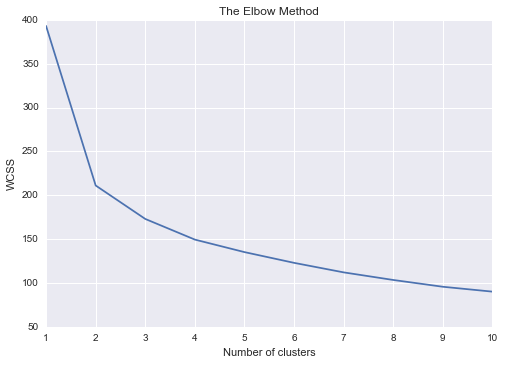

In [8]:
# Using the elbow method to find the optimal number of clusters
find_optimal_num_clusters(airCust_clusters)

In [9]:
# Run K-Means Clustering and summarize
cluster_results = kmeans_cluster(airCust_clusters, 5)
cluster_summary = summarize_clustering(cluster_results)
cluster_summary

,Cluster,Count,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,0,407,0.108878,0.033777,0.227079,0.289869,0.048874,0.090167,0.719807
1,1,1008,0.019504,0.009651,0.016007,0.062131,0.006669,0.010389,0.208147
2,2,1150,0.033922,0.011592,0.038915,0.103680,0.008682,0.015209,0.524576
3,3,872,0.046449,0.007295,0.048169,0.117586,0.007047,0.012442,0.812765
4,4,562,0.051882,0.015178,0.115130,0.243979,0.030172,0.050057,0.303453


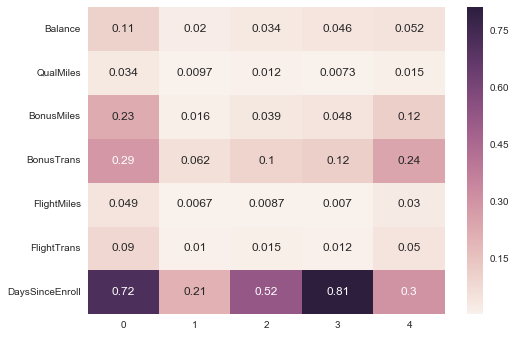

In [10]:
# Visualize the Clusters using a heatmap
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [11]:
# Give meaningful, business focused names to each Cluster
pd.set_option('mode.chained_assignment', None)
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'LongTime-PointAccumulators'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'New-Infrequent Fliers'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'MediumVintage-Occasional Fliers'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Dormant Customers'
cluster_results['Cluster Name'][cluster_results['Cluster']==4] = 'New-Frequent Fliers'

In [12]:
# Update the original dataframe with cluster details
airCust = airCust.reset_index().drop('index', axis=1)
airCust['Cluster'] = cluster_results['Cluster']
airCust['Cluster Name'] = cluster_results['Cluster Name']

In [13]:
# Randomly select some records to understand the clustering output
airCust.sample(5)

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Cluster,Cluster Name
2943,43510,0,4850,6,350,2,3328,2,MediumVintage-Occasional Fliers
2491,5970,0,1000,1,0,0,3091,1,New-Infrequent Fliers
1477,120447,0,53804,15,350,1,4840,2,MediumVintage-Occasional Fliers
2295,70789,0,76661,29,150,1,3810,4,New-Frequent Fliers
3277,50987,0,0,0,0,0,2259,1,New-Infrequent Fliers
